In [1]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target
print(X_iris.shape, y_iris.shape)
print(X_iris[0], y_iris[0])

/Users/hhw/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


(150, 4) (150,)
[5.1 3.5 1.4 0.2] 0


/Users/hhw/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:242: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  target = np.empty((n_samples,), dtype=np.int)
/Users/hhw/anaconda3/lib/python3.7/site-packages/sklearn/datasets/base.py:246: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your c

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn import metrics

X, y = X_iris[:,:2], y_iris
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=33)

/Users/hhw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps,
/Users/hhw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:597: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  eps=np.finfo(np.float).eps, copy_X=True, 

In [5]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal width')

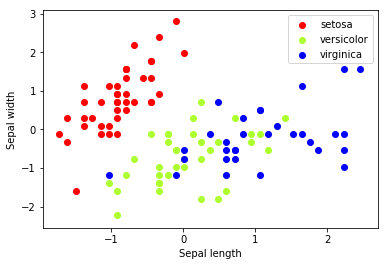

In [7]:
colors = ['red','greenyellow','blue']
for i in range(len(colors)):
    xs = X_train[:, 0][y_train ==i]
    ys = X_train[:, 1][y_train ==i]
    plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [8]:
clf = SGDClassifier()
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

/Users/hhw/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[[-30.0529983   15.10190396]
 [ -5.21734957  -8.09288633]
 [ 14.90671306   2.69762878]]
[-16.72289503  -3.13531992  -4.55875246]


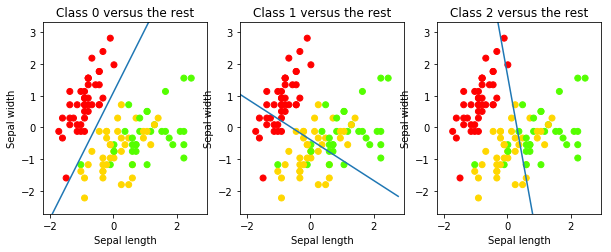

In [9]:
x_min, x_max = X_train[:, 0].min()-.5,X_train[:,0].max()+.5
y_min, y_max = X_train[:, 1].min()-.5,X_train[:,1].max()+.5
xs = np.arange(x_min,x_max,0.5)
fig, axes = plt.subplots(1,3)
fig.set_size_inches(10, 6)
for i in [0,1,2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

In [12]:
print(clf.predict(scaler.transform([[4.7,3.1]])))
print(clf.decision_function(scaler.transform([[4.7,3.1]])))
y_train_pred = clf.predict(X_train)
print(metrics.accuracy_score(y_train, y_train_pred))
y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

[0]
[[ 22.40482332   2.75219122 -23.10586324]]
0.8392857142857143
0.6578947368421053


In [13]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names) )
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.38      0.27      0.32        11
   virginica       0.64      0.74      0.68        19

   micro avg       0.66      0.66      0.66        38
   macro avg       0.67      0.67      0.67        38
weighted avg       0.64      0.66      0.64        38

[[ 8  0  0]
 [ 0  3  8]
 [ 0  5 14]]


In [1]:
print("My name is Hyoung Woo Hahm")
print("My NetID is: 661790448")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hyoung Woo Hahm
My NetID is: 661790448
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
